<a href="https://colab.research.google.com/github/charle0911/2nd-ML100Days/blob/master/homework/Day67_Keras_Dataset_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [3]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [6]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [22]:
y_label_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [8]:
# 查詢檔案維度資訊
x_img_test.shape


(10000, 32, 32, 3)

In [21]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [0]:
#針對物件圖像數據集的類別編列成字典

label_dict=["mammals-beaver","dolphin","otter","seal","whale","aquarium-fish","flatfish","ray","shark","trout","orchids","poppies","roses","sunflowers","tulips","containers-bottles","bowls","cans","cups","plates","and-vegetables-apples","mushrooms","oranges","pears","sweet-peppers","electrical-devices-clock","computer-keyboard","lamp","telephone","television","furniture-bed","chair","couch","table","wardrobe","bee","beetle","butterfly","caterpillar","cockroach","carnivores-bear","leopard","lion","tiger","wolf","man-made-outdoor-things-bridge","castle","house","road","skyscraper","natural-outdoor-scenes-cloud","forest","mountain","plain","sea","omnivores-and-herbivores-camel","cattle","chimpanzee","elephant","kangaroo","fox","porcupine","possum","raccoon","skunk","crab","lobster","snail","spider","worm","baby","boy","girl","man","woman","crocodile","dinosaur","lizard","snake","turtle","mammals-hamster","mouse","rabbit","shrew","squirrel","maple","oak","palm","pine","willow","bicycle","bus","motorcycle","pickup-truck","train","lawn-mower","rocket","streetcar","tank","tractor"]


In [31]:
label_dict[1]

'dolphin'

In [0]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

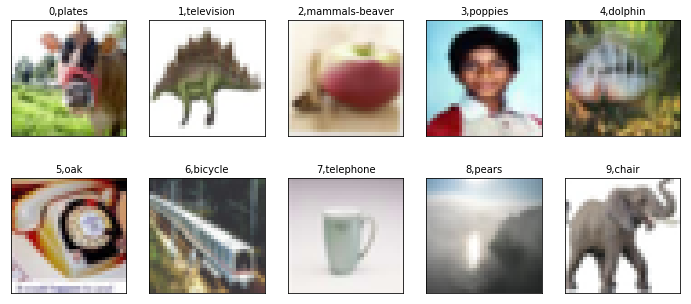

In [33]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [35]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [0]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [37]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [38]:
y_label_train.shape

(50000, 1)

In [39]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [0]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [41]:
y_label_train_OneHot.shape

(50000, 100)

In [42]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.